# Single flip Metropolis algorithm for Ising model 
Correlation functions of magnetization with respect to Markov step intevals $\tau$ at different temperatures are calculated. As expected, Correlation function $C(\tau)$ decay exponentially regularly at several temeratures. By fitting the logarithm of correlation functions linearly, we can obtain the correlation time $\tau_{cor}$. It increases with inverse temperature $\beta$.

Fixing the total number of Markov trials N_tot = 240000 and varing the number of Markov chains from 5 to 600, we can observe the efficiency, defined as $\frac{1}{T\sigma^2}$, peaks around 50-100 chain, where T is the runtime of the Markov loop and $\sigma$ is the variance of magnetization. In practice, first 50 trials of each chain are discarded, and average of each 50 trials is taken as one measure of magnetization. As already calculated, the correlation time at $\beta=0.8$ is about 16.

In [131]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import time
from scipy.optimize import curve_fit
import pickle

# Ising model energy function

In [132]:
def E(s):
    return(sum([s[i]*s[i+1] for i in range(len(s)-1)]))


# Definition of constants
N_tot =N_chain * M is the total number of trials. N_chain is the number of chains. M is the length of each Markov chain.

N is the length of the 1D-Ising chain

beta is the inverse temperature

In [228]:
def MC_ising(N_chain,M,N,beta):
    import time



    List_m = [] # List of Magnetization of each chain at time t
    a=[0]*N_chain # Counting Accepted trials

    #loop
    start = time.time()
    
    #initiate configurations for N_chain Markov chains
    s=2*np.random.binomial(1, 0.5, (N_chain,N))-1    
    
    for t in range(M):  # trial t 
        #if t%10000==0:
        #    print(t)
        m_t=[] # magnetization at time t
        # trial 
        random_flip = N*np.random.rand(N_chain)
        random_acc=np.random.rand(N_chain)
        spin_flip=[int(i) for i in random_flip] # index of the chosen spin
        s_trial=copy.deepcopy(s)
        for i in range(N_chain):# trial configuration by single flip
            s_trial[i][spin_flip[i]] *= -1
            if np.exp(-beta*(E(s_trial[i])-E(s[i]))) > random_acc[i]: # accepted
                s[i] = s_trial[i]
                a[i] += 1
            m_t.append(sum(s[i])/N) # magnetization of the j-th chain at time t
        List_m.append(m_t)
        
    end = time.time()
    
    time = end-start
    AcceptanceRate = sum(a)/(M*N_chain)
    
    List_m=list(zip(*List_m)) # transpose
    List_m_cut=[m_t[50:] for m_t in List_m] # discard first 50 trials of each Markov chain
    m_tot=[m for m_t in List_m_cut for m in m_t] # flatten all the useful magnetization
    
    m_reduced = [np.mean(m_tot[50*i:50*i+49]) for i in range(len(m_tot)//50)] # Take 50 as the length of a group, larger than the correlation time
    expect_m = np.mean(m_reduced)
    error_m = np.var(m_reduced)

    return(List_m,expect_m, error_m, time, AcceptanceRate)

# Correlation time
As shown in the figures below, the autocorrelation function $C(\tau)$ decays exponentially. After fitting $\log{C(\tau)}$ linearly, we can obtain the correlation time $\tau_{cor}(\beta)$. The correlation time $\tau_{cor}$ increases with $\beta$.

calculating 0 beta= 0.5
calculating 1 beta= 0.7142857142857143
calculating 2 beta= 0.9285714285714286
calculating 3 beta= 1.1428571428571428
calculating 4 beta= 1.3571428571428572
calculating 5 beta= 1.5714285714285714
calculating 6 beta= 1.7857142857142856
calculating 7 beta= 2.0
Completed !


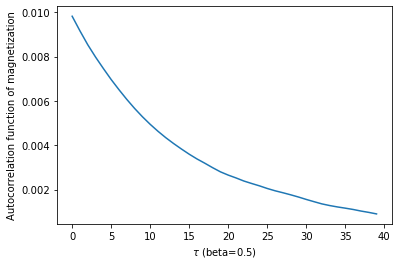

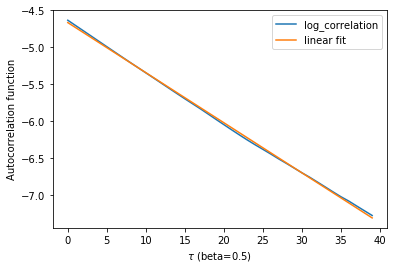

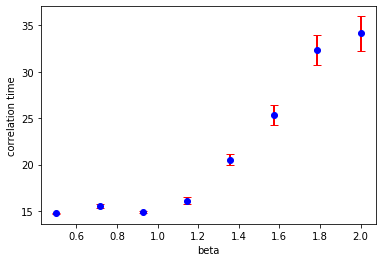

In [230]:
def fit(tau,tau_cor,A): 
     return -tau/tau_cor+A
    
def tau_cor(beta):
    result = MC_ising(1,200000,40,beta)

    m = [result[0][0][i] for i in range(len(result[0][0]))]

    c=[0]*40
    for tau in range(40):
        for i in range(len(result[0][0])-tau-50):
            c[tau]+=m[i+50]*m[i+tau+50]
        c[tau]=c[tau]/(len(result[0][0])-tau-50)

    log_c=[np.log(ct) for ct in c]
    
    list_tau = list(range(40))
    popt,pcov=curve_fit(fit,list_tau,log_c) 
    tau_cor=popt[0]; err_cor=np.sqrt(pcov[0,0])
    A=popt[1]
    return(tau_cor,A,err_cor,c)

list_beta = np.linspace(0.5,2,8)

list_tau_cor=[]
list_err = []
list_A = []
list_c = []
i=0

for beta in list_beta:
    result = tau_cor(beta)
    list_tau_cor.append(result[0])
    list_err.append(result[2])
    
    list_A.append(result[1])
    list_c.append(result[3])
    print('calculating',i,'beta=',beta)
    i+=1
print('Completed !')
    

plt.plot(list(range(40)),c)
plt.xlabel(r'$\tau$ (beta=0.5)')
plt.ylabel('Autocorrelation function of magnetization')
plt.show()

log_c=[np.log(ct) for ct in list_c[0]]

list_y=[-t/list_tau_cor[0]+list_A[0] for t in list(range(40))]
plt.plot(list(range(40)),log_c,label='log_correlation')
plt.plot(list(range(40)),list_y,label='linear fit')
plt.xlabel(r'$\tau$ (beta=0.5)')
plt.ylabel('Autocorrelation function')
plt.legend(loc='upper right')
plt.show()

#print(list_tau_cor)
#print(list_err)


plt.errorbar(list_beta, list_tau_cor, yerr=list_err,fmt='o',ecolor='r',color='b',elinewidth=2,capsize=4)
plt.ylabel('correlation time')
plt.xlabel('beta')
plt.show()


# Definition of Hyperparameters

In [214]:
# length of the Ising model
N = 40
# total trial

N_tot = 240000
# number of Markov chains
LN_chain = [5,10,20,40,50,80,100,150,200,400,600]#[2,5,10,16,20,30,40,50,60,80,100,200,800,1200] #np.arange(10,100,2)

# length of each Markov chain
L_M = [N_tot//N_chain for N_chain in LN_chain]

# inverse temperature
beta = 0.8

print('LN_chain =',LN_chain)
print('LM =', L_M)

LN_chain = [5, 10, 20, 40, 50, 80, 100, 150, 200, 400, 600]
LM = [48000, 24000, 12000, 6000, 4800, 3000, 2400, 1600, 1200, 600, 400]


In [215]:
Lm_expect=[]
Lm_error=[]
Ltime = []
Leff = []
Lacc = []

for i in range(len(LN_chain)):
    print('calculating N_chain=',LN_chain[i])
    list_m,expect_m,error_m,time,AcceptanceRate = MC_ising(LN_chain[i],L_M[i],N,beta)
    Lm_expect.append(expect_m)
    Lm_error.append(error_m)
    Ltime.append(time)
    Lacc.append(AcceptanceRate)
    Leff.append(1/(time*error_m**2))

print('Complete!')

calculating N_chain= 5
calculating N_chain= 10
calculating N_chain= 20
calculating N_chain= 40
calculating N_chain= 50
calculating N_chain= 80
calculating N_chain= 100
calculating N_chain= 150
calculating N_chain= 200
calculating N_chain= 400
calculating N_chain= 600
Complete!


# Magetization with errorbar

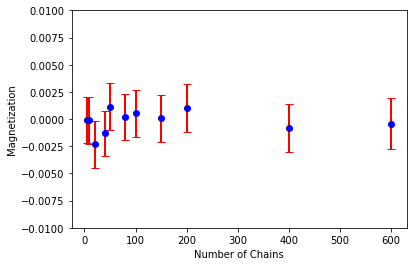

For 600 chains, the magnatezation m =  -0.0004 ± 0.0023


In [225]:
plt.errorbar(LN_chain, Lm_expect, yerr=Lm_error,fmt='o',ecolor='r',color='b',elinewidth=2,capsize=4)
plt.ylabel('Magnetization')
plt.xlabel('Number of Chains')
plt.ylim(-0.01,0.01)
plt.show()
print('For 600 chains, the magnatezation m = ',round(Lm_expect[-1], 4),'±',round(Lm_error[-1],4))

# Acceptance rate

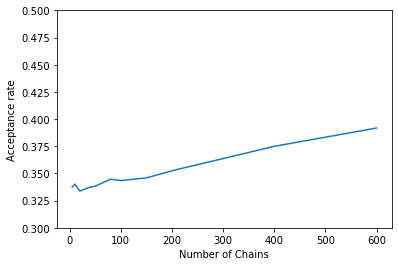

Average acceptance rate is 0.3491227272727273


In [221]:
plt.plot(LN_chain,Lacc)
plt.ylabel('Acceptance rate')
plt.xlabel('Number of Chains')
plt.ylim(0.3,0.5)
plt.show()
print('Average acceptance rate is',np.mean(Lacc))

# Effeciency for different Number of Markov chains
Effeciency = $\frac{1}{T\sigma^2}$, where T is the run time, $\sigma$ is the variance.

The efficiency peaks around 50 chains

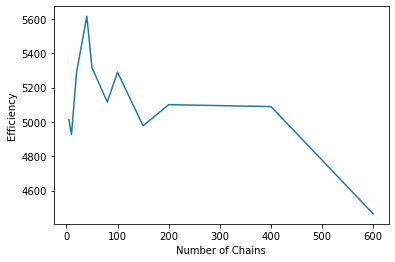

In [226]:
plt.plot(LN_chain,Leff)
plt.ylabel('Efficiency')
plt.xlabel('Number of Chains')
plt.show()